# Notebook 2:  Clustering con GMM y Algoritmos Jerárquicos

En este notebook vamos a implementar el algoritmo de clustering de Mezcla de Normales en R. El objetivo es entender como funciona este algoritmo y  aprender a utilizarlo con un ejemplo simple. Se incluye además la estrategia para definir el número de grupos k. Al final se propone un ejercicio con nuevos datos, con el fin de aprender a utilizar el algoritmo. 

In [2]:
#install.packages("mclust")
#install.packages("cluster")
library(mclust)
library(cluster)
#ruta datos
#lee datos del archivo de texto como una matriz. La primera #columna se utiliza como vector de nombres de las filas
datos <-read.table("..//data//semillas1.txt",dec=".")
summary(datos)

Package 'mclust' version 6.0.0
Type 'citation("mclust")' for citing this R package in publications.



       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6       
 Min.   :0.765   Min.   :4.519  
 1st Qu.:2.562   1st Qu.:5.045  
 Median :3.599   Median :5.223  
 Mean   :3.700   Mean   :5.408  
 3rd Qu.:4.769   3rd Qu.:5.877  
 Max.   :8.456   Max.   :6.550  

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 4 components: 

 log-likelihood   n df       BIC       ICL
       177.3167 210 93 -142.6475 -157.7975

Clustering table:
 1  2  3  4 
67 75 23 45 

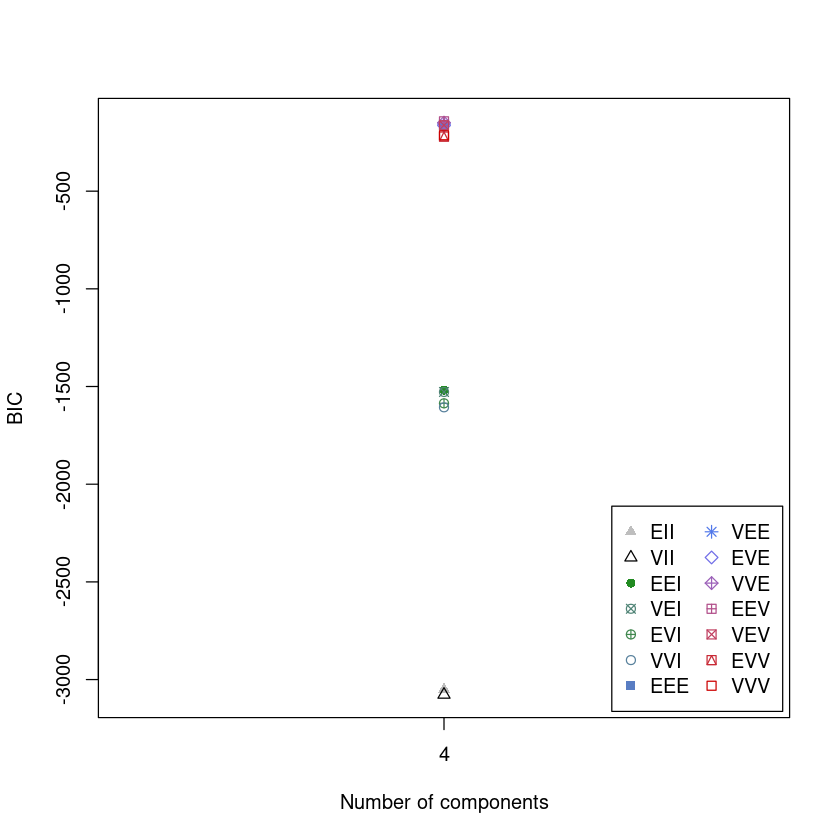

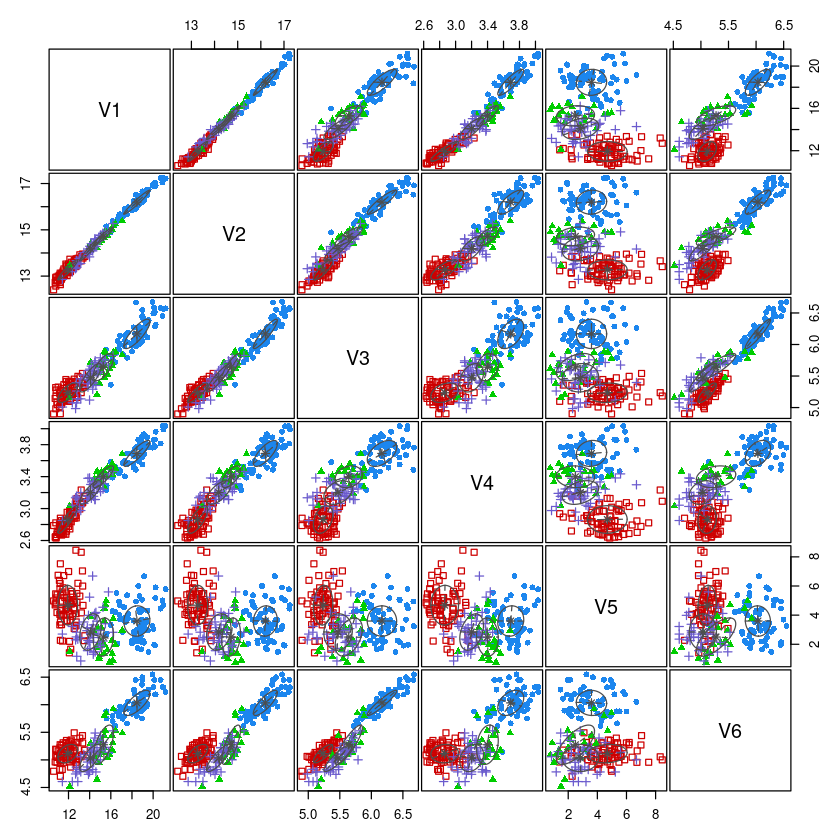

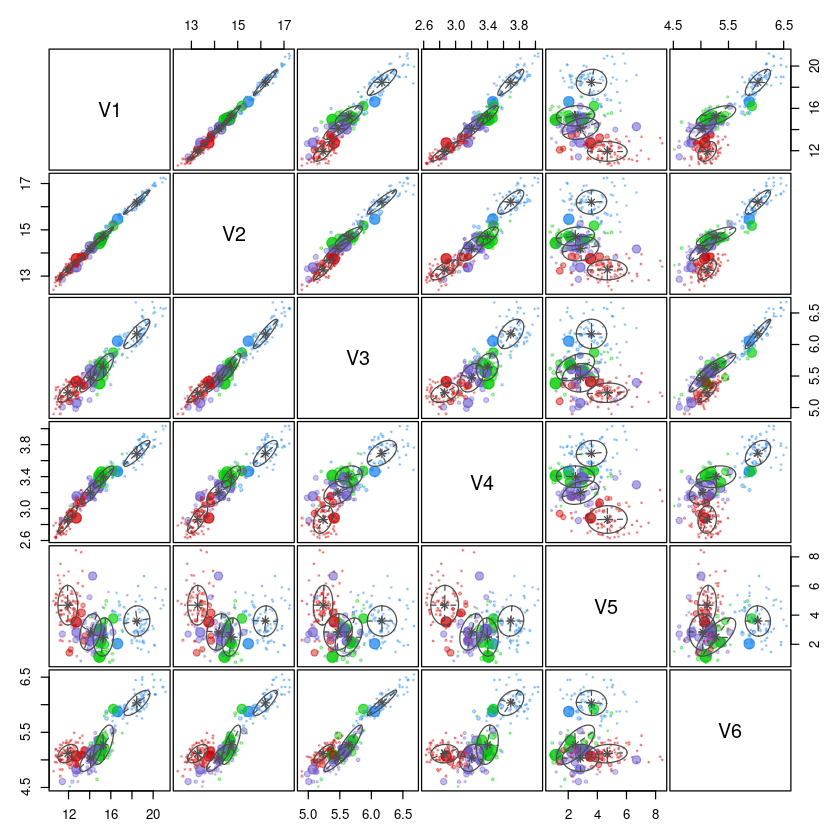

'Mclust' model object: (EEV,4) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

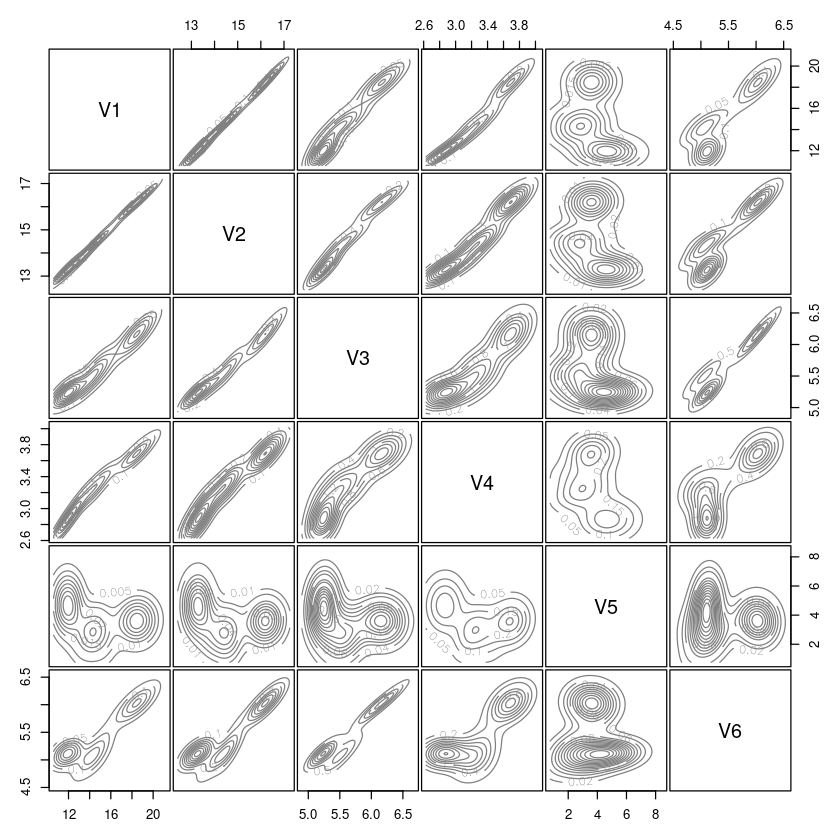

In [3]:
clus <-Mclust(datos, G=4)
summary(clus)
plot(clus)
clus




In [4]:
cl <- clus$classification
centers <- t(clus$parameters$mean)
centers
cl




V1,V2,V3,V4,V5,V6
18.46213,16.19470,6.167813,3.690301,3.596481,6.033091
11.93175,13.27016,5.234781,2.863010,4.682985,5.113286
15.29414,14.71759,5.641832,3.398164,2.495003,5.274619
14.07522,14.18237,5.472207,3.200684,2.842341,5.035122


1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
  1   1   1   2   4   4   3   4   1   4   2   3   1   1   1   2   2   3   1   2 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
  2   1   4   2   2   3   2   4   4   1   4   4   2   3   1   1   1   2   4   2 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
  2   2   1   2   2   1   1   2   2   2   1   4   1   2   4   4   1   3   1   2 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
  4   1   4   4   1   4   1   3   1   2   1   3   1   1   4   1   4   1   4   1 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
  1   3   3   4   1   2   4   2   2   2   2   2   4   2   3   2   1   2   2   2 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
  2   2   1   2   3   4   4   3   4   3   1   4   2   2   2   3   4   3   2   4 
121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 
  2   1   2   2   1   1   4   4   3   3   4   2   2   1   1   1   2   3   1   3 
141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 
  1   2   1   2   2   1   2   2   1   1   2   4   2   2   2   2   1   4   2   3 
161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 
  1   1   1   4   3   4   2   4   2   2   4   2   2   4   1   1   1   4   1   4 
181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 
  2   1   2   4   4   1   1   1   1   2   2   2   2   1   1   2   2   2   4   1 
201 202 203 204 205 206 207 208 209 210 
  1   2   3   2   4   2   1   1   2   1

**Ejercicio 1:**

a) Explique como funciona el método Mclust, describa los principales parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

Respuesta Ejercicio 1

a) El método Mclust permite ajustar un modelo de mezclas de normales a un conjunto de datos, lo que permite encontrar grupos o subpoblaciones dentro de los datos. El método funciona mendiante la estimación de parámetros usando el algoritmo de EM para el modelo estimado. Y luego el modelo óptimo se obtiene utilizando el criterio de información Bayesiano.

<strong>Parámetros de Entrada : https://www.rdocumentation.org/packages/mclust/versions/5.4.6/topics/Mclust</strong><br>

data:Conjunto de datos que serviran para el clustering<br>
G:Número grupos, por defecto va entre 1, 2 o 9 grupos<br>
modelName: tipo de configuracion de la distribución normal multivariada a utilizar en EM<br>
prior: Permite especificar la distribuicion a priori.
control: Parametro de control de EM (como tolerancia de convergencia)<br>
initialization: Clustering inicial (Parametro Opcional)<br>
warn:manejo de advertencias<br>
x: mclustBIC que sirve para clasificar nuevos datos o proveer estos valores, por ejemplo a los valores BIC de los modelos.<br>

<strong>Parámetros de Salida</strong><br>
data: Matriz con datos de entrada<br>
modelName: modelo que se obtuvo del valor óptimo de BIC<br>
n:numero de observaciones de los datos<br>
d:dimensiones de los datos<br>
G:número optimo de grupos<br>
BIC: todos los valores de BIC<br>
df:número de parámetros de estimados<br>
bic:valores de BIC del modelo seleccionado<br>
icl: valores de ICL del modelo seleccionado<<br>
parameters: lista de las componentes: 'pro'(proporcion),'mean'(media) y 'variance'(varianza) estimada para cada clase.<br>
z: matriz cuya [i,k]-ésima entrada es la probabilidad que la observacion de i en los datos de prueba pertenezca a la k-ésima clase. <br>
classification: clasificacion correspondiente a z (clase de mayor probabilidad para cada observacion)<br>



b)  Como se puede entender sobre los cuatro grupos creados es que, en promedio, el grupo 1 presenta un área A más de 4 unidades mayor que las semillas del  grupo 4, de la misma manera en estos grupos el perimetro es más de 2 unidades mayor en el grupo 1 con respecto al grupo 4, aunque el grupo 2 presenta una diferencia de casi 3 unidades menos con respecto al grupo 1 en perimetro. También, el grupo 2 tiene un coeficiente de asimetría más de 2 unidades mayor que el del grupo 3. Esto muestra que realmente los grupos se distribuyen de manera que no existe una clara correlación a simple vista entre los datos, con esto nos referimos a que no se ve un gradiente de datos donde exista un grupo infimo y uno supremo, y otros grupos que existan entre medio. Para poder analizar los datos de manera concluyente se necesitaría ver otras metricas, como las de tendencia, dispersión y asociación. 

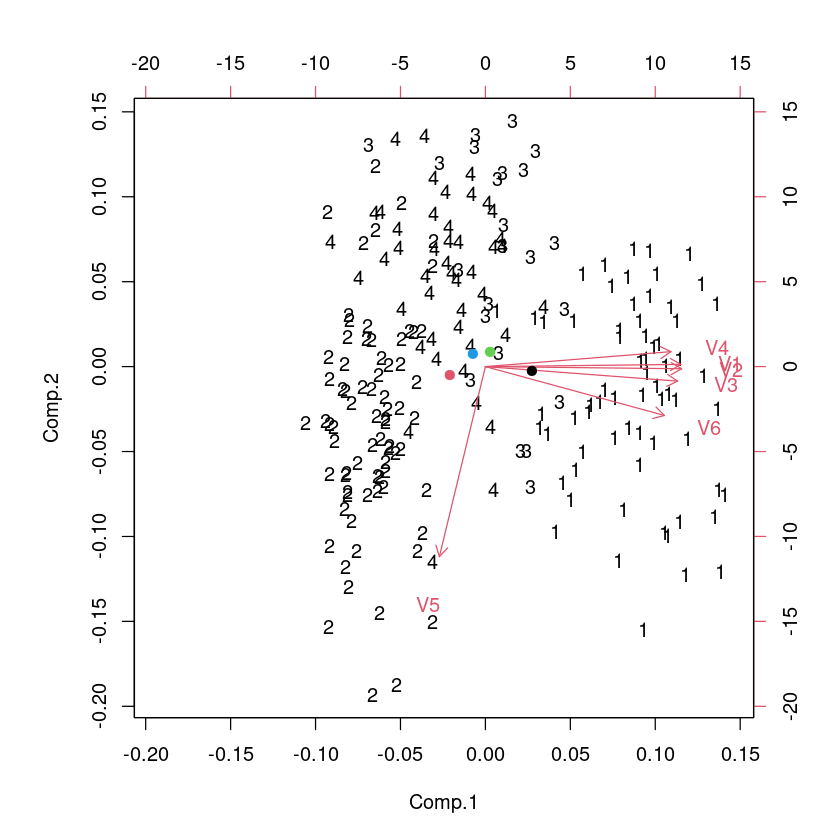

In [5]:
#Análisis de Componentes Principales para graficar los grupos obtenidos
#Calcula plano de componentes principales y grafica las observaciones con el número de su grupo
res <- princomp(datos, cor=TRUE)
res2 <- predict(res,centers)

biplot(res,xlabs=cl)
#grafica los centros de cada grupo en el plano de componentes principales utilizando colores distintos
points(res2[,1:2],col=1:9,pch=19)


**Criterio de Información Bayesiano**

Una forma de discriminar entre posibles agrupamientos, es calcular el Criterio de Información Bayesiano, cuya expresión genérica es:
$$BIC = log L(Datos\mid \hat{\theta}) - \frac{d}{2}log(N)$$
donde $d$ es el número de parámetros libres y $N$ el número de observaciones. A medida que aumenta el número de parámetros la verosimilitud aumenta, pero esto es moderado por el término en que depende de $d$.

Mclust calcula automática el BIC para distintas configuraciones de las matrices covarianza de cada Normal multivariada (que corresponden a distintos números de parámetros) así como distinto número de grupos. Por parsimonia, es recomendable escoger el primer número de grupos que representa un máximo local.

**Ejercicio 2:**

a) Utilice Mclust sin definir el número de grupos y considere el Criterio de información Bayesiano (BIC) para decidir el número de grupos óptimo. 

b) Discuta y compare  sus resultados con aquellos obtenidos con k-means

**En lo que sigue, utilizaremos el método hclust, que permite realizar análisis de agrupamiento jerárquico**

---------------------------------------------------- 
Gaussian finite mixture model fitted by EM algorithm 
---------------------------------------------------- 

Mclust EEV (ellipsoidal, equal volume and shape) model with 2 components: 

 log-likelihood   n df      BIC       ICL
       80.12963 210 49 -101.749 -104.2238

Clustering table:
  1   2 
 71 139 

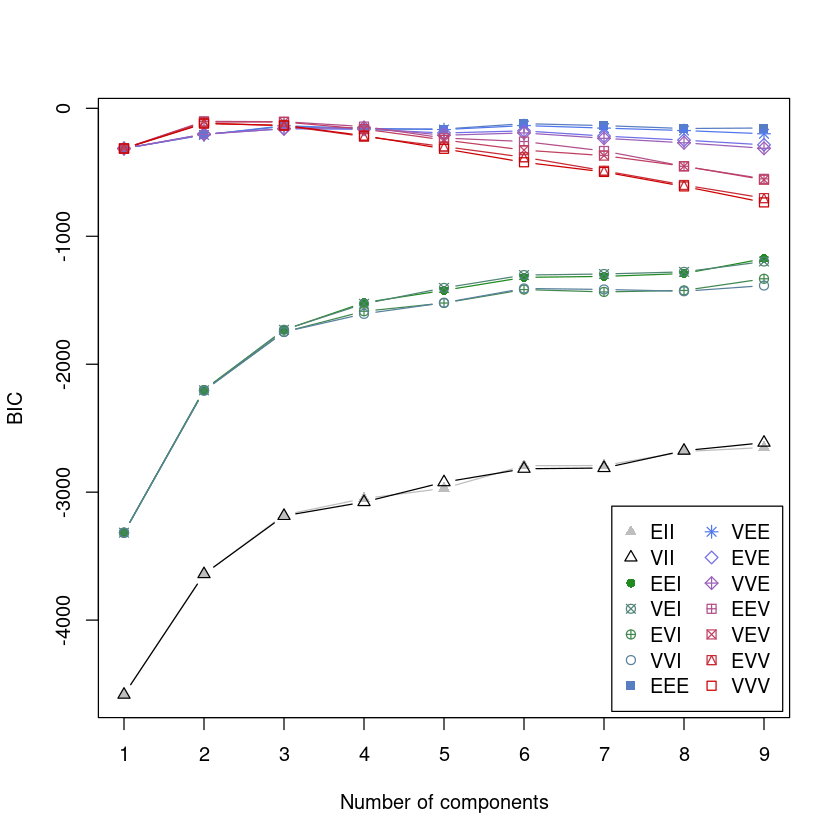

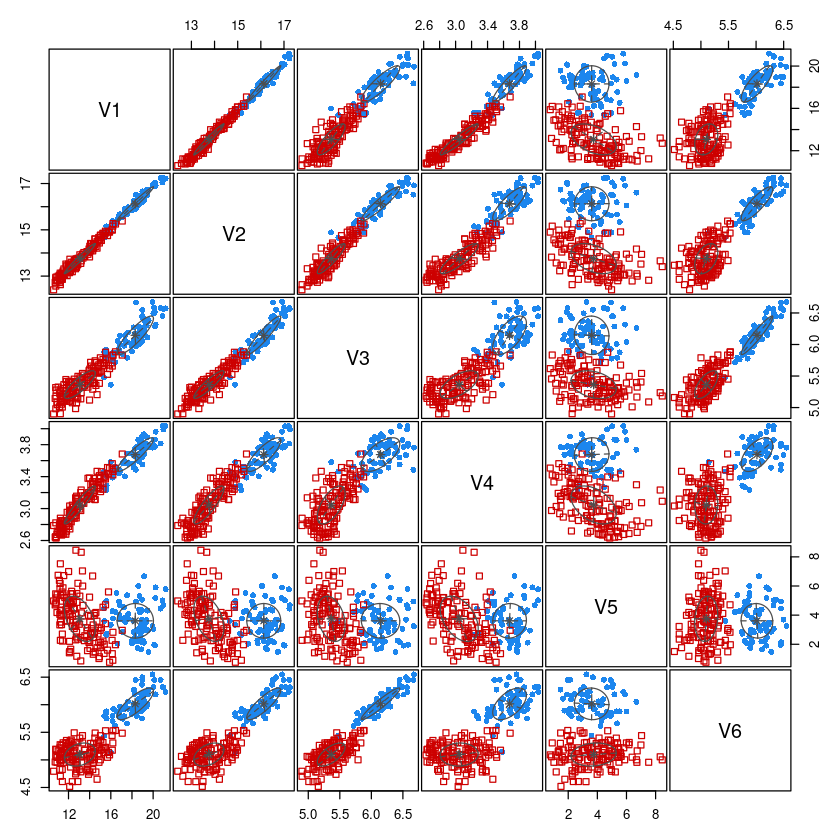

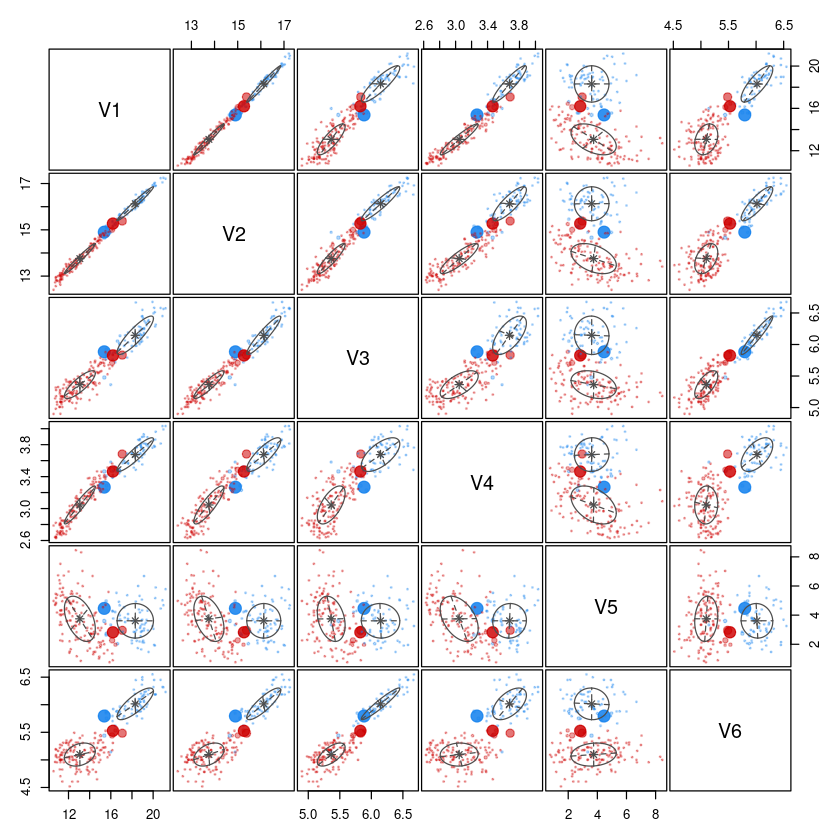

'Mclust' model object: (EEV,2) 

Available components: 
 [1] "call"           "data"           "modelName"      "n"             
 [5] "d"              "G"              "BIC"            "loglik"        
 [9] "df"             "bic"            "icl"            "hypvol"        
[13] "parameters"     "z"              "classification" "uncertainty"   

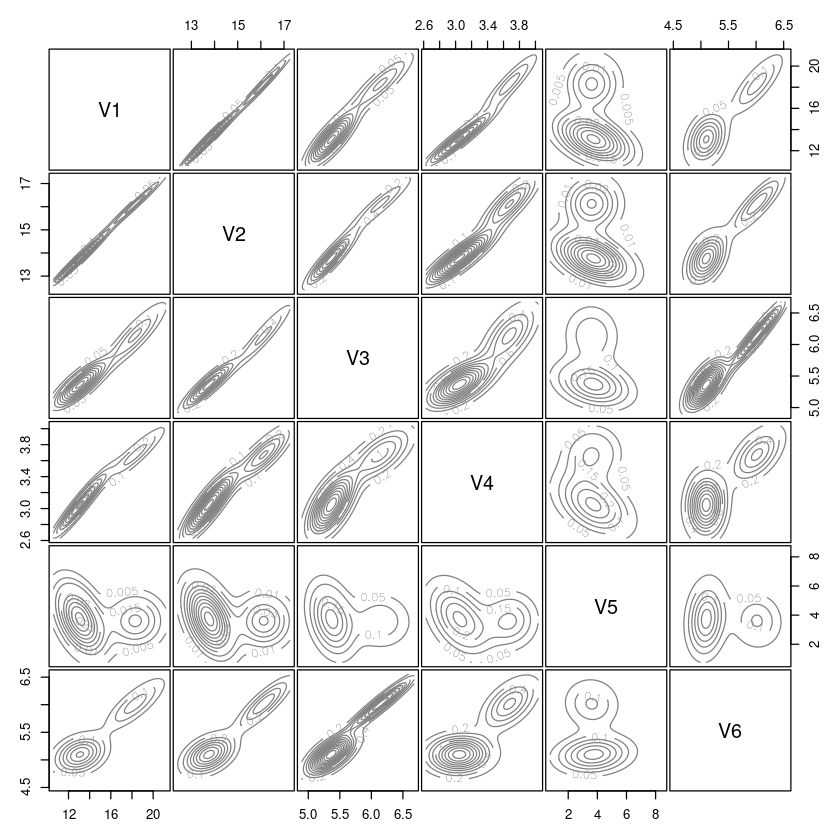

In [6]:
clus <- Mclust(datos)
summary(clus)
plot(clus)
clus

b) Estudiando el BIC nos entrega que la cantidad de grupos optimos es 2, ya que alli se produce el primer máximo, lo cual es bueno si no tenemos contexto del problema para escoger un número estimado para el grupo. Comparando los resultados de k-means, es diferente al obtenido acá, ya que en el trabajo anterior con k-means nos habia dado que el grupo óptimo era 3, y esto igual puede traer ciertos conflictos con el estudio, ya que al escoger 2, este número puede no ser una cantidad representativa. 

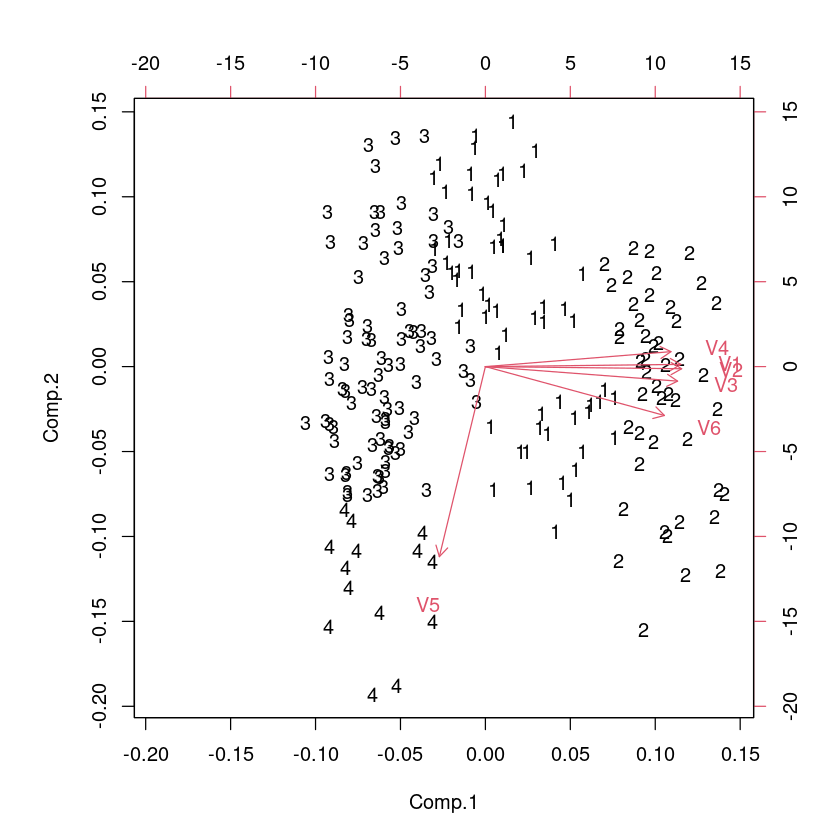

In [7]:
res3 <- hclust(dist(datos))
biplot(res, xlabs= cutree(res3,4))

**Ejercicio 3:** 

a) Explique como funciona el método hclust, describa parámetros de entrada y salida.

b) Interprete y comente los resultados obtenidos. 

c) Utilice otros parámetros en hclust y discuta como varían los resultados. 

<strong>Respuesta</strong><br>
a) El método hclust realiza un análisis jerárquico aglomerativo. Este metodo agrupa los datos basandose en la matriz de disimilaridades que se entrega por argumento y también el método seleccionado para definir la distancia entre los grupos ("single", "complete", "average", "median",...).<br>
<strong>Parametros de entrada: https://www.rdocumentation.org/packages/stats/versions/3.6.2/topics/hclust</strong><br>
d: disimilaridad producida por 'dist'<br>
method: método de aglomeracion (single, complete, average, etc)<br>
members: NULL o un vector de logitud de d<br>
x: un objetivo del tipo producido por hclust<br>
<strong>Parámetros de salida</strong><br>
merge:matriz de (n-1) x 2 que por fila tiene: un paso en el algoritmo aglomerativo, descritos por los indices que tienen signo -, de las observaciones que se agrupan o el número de pasos (con signo +) del paso anterior en que se definió el grupo que se va a hacer merge. <br>
height: conjunto de n-1 valores reales. Es el valor de criterio asociado con el método de agrupamiento.<br>
order: vector que da la permutación de las observaciones originales adecuadas, para de esta forma no tener cruces de ramas.<br>

b) En el gráfico que se obtenido anteriormente, nos da la información que v1,v2,v3,v4 y v6 están correlacionas entre sí, mientras que v5 no. Así mismo los valores 2 estan más presentes en los v1, v2, v3 y v4, mientras que para v5, el valor 4 está más presente.

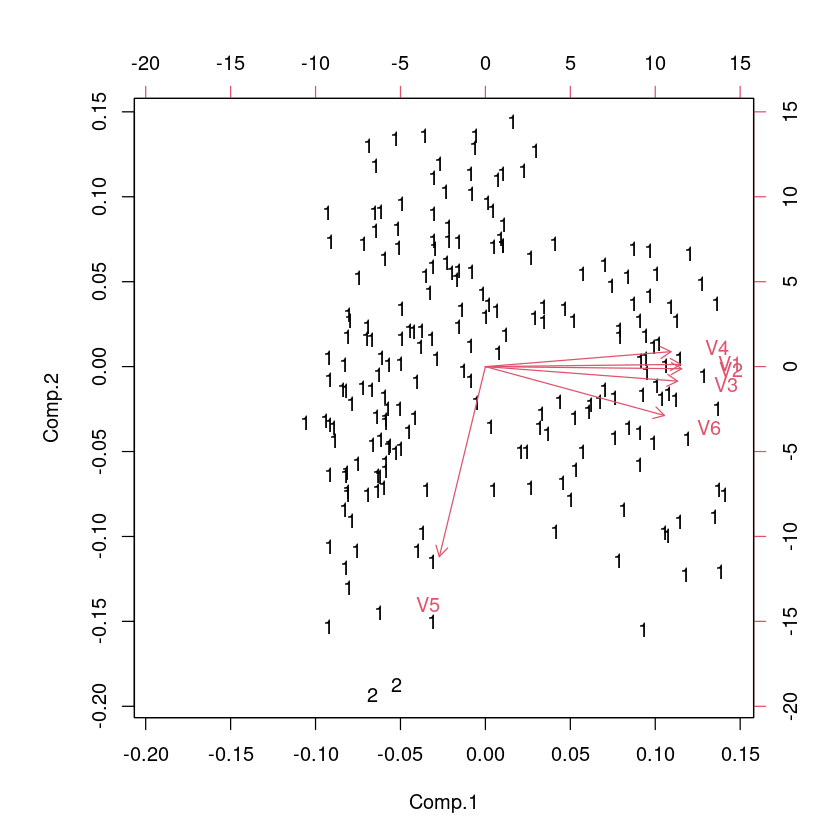

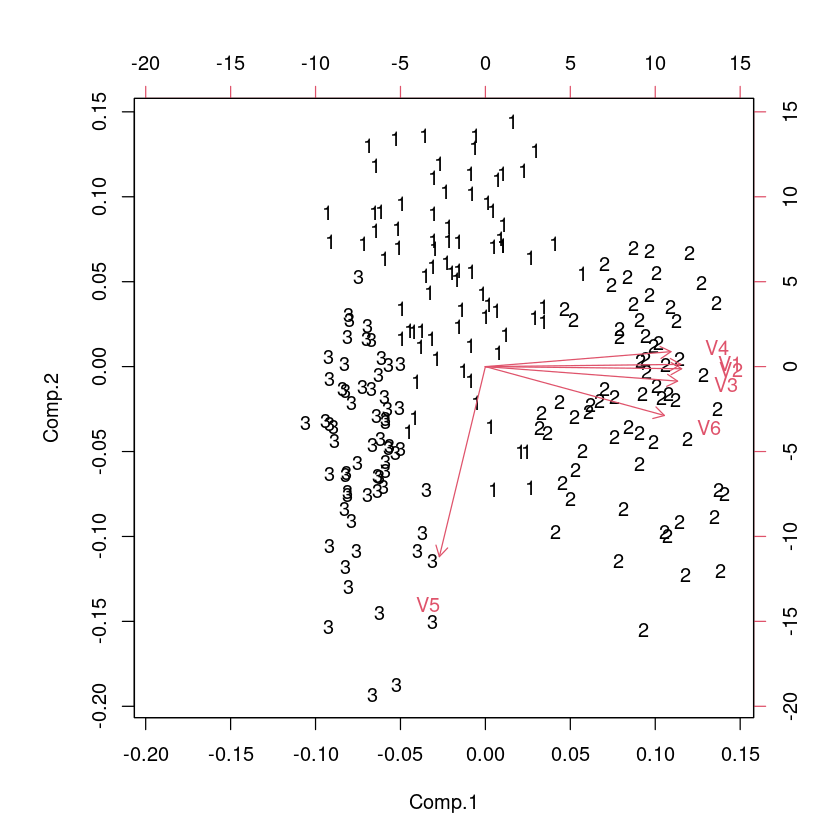

In [11]:
#c)
res4 <- hclust(dist(datos), method = "single")
res5 <- hclust(dist(datos), method = "average")
biplot(res, xlabs= cutree(res4,2))
biplot(res, xlabs= cutree(res5,3))


**Ejercicio 4:** (3 puntos)

a) Estudie las medidas de calidad propuestas en Murphy, Capítulo 25: purity, rand index y mutual information (pdf en siveducMD) y resuma brevemente en que consisten.

Considere el archivo "semillas.txt" que contiene una séptima variable con la clasificación de las semillas en tres variedades: 
- 1: Kama
- 2: Rosa
- 3: Canadian

b) Realice un análisis de clustering con K-means, GMM y Análisis Jerárquico, con las variables de caracterización de las semillas (V1 a V6)  y considerando K=3 como número de grupos.

c) Calcule alguna de las medidas de calidad estudiadas para los agrupamientos obtenidos en (b), considerando la etiqueta en V7 para sus cálculos. Compare y discuta sus resultados.

a) <br>
Purity: Medida entre 0 y 1 para calcular que tan diferentes son los datos a partir de la tabla de contingencia<br>
Rand Index: <br>
Mutual Information: <br>

In [9]:
datos1 <-read.table("..//data//semillas.txt",dec=".")
summary(datos1)

       V1              V2              V3              V4       
 Min.   :10.59   Min.   :12.41   Min.   :4.899   Min.   :2.630  
 1st Qu.:12.27   1st Qu.:13.45   1st Qu.:5.262   1st Qu.:2.944  
 Median :14.36   Median :14.32   Median :5.524   Median :3.237  
 Mean   :14.85   Mean   :14.56   Mean   :5.629   Mean   :3.259  
 3rd Qu.:17.30   3rd Qu.:15.71   3rd Qu.:5.980   3rd Qu.:3.562  
 Max.   :21.18   Max.   :17.25   Max.   :6.675   Max.   :4.033  
       V5              V6              V7   
 Min.   :0.765   Min.   :4.519   Min.   :1  
 1st Qu.:2.562   1st Qu.:5.045   1st Qu.:1  
 Median :3.599   Median :5.223   Median :2  
 Mean   :3.700   Mean   :5.408   Mean   :2  
 3rd Qu.:4.769   3rd Qu.:5.877   3rd Qu.:3  
 Max.   :8.456   Max.   :6.550   Max.   :3  

In [12]:

clus <-Mclust(datos, G=3)
cl <- clus$classification
tab <- table(datos1$V7, cl)datos1 <-read.table("..//data//semillas.txt",dec=".")

tab

   cl
     1  2  3
  1  0 13 57
  2 68  0  2
  3  0 70  0